# Детектор углов Harris

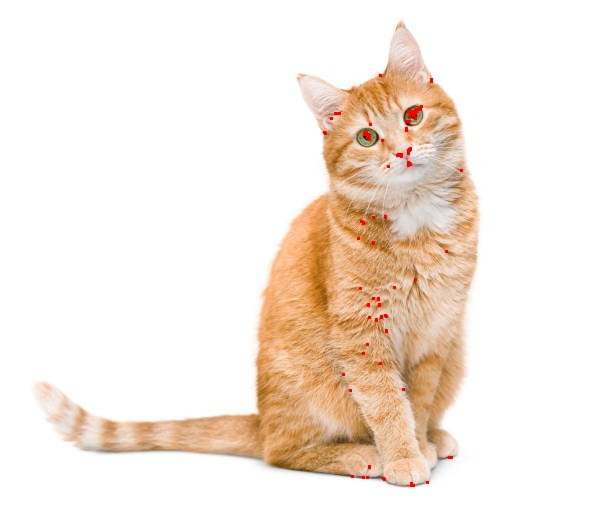

In [ ]:
import cv2
from IPython.display import Image, display
import numpy as np
# Загрузка изображения
img = cv2.imread('cat.jpg')
# Преобразование в оттенки серого. Детектор Хариса работает с интенсивностью, поэтому цветное изображение нужно преобразовать в черно-белое.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Применение детектора углов Harris
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.09)
# Расширение результата для лучшей визуализации
dst = cv2.dilate(dst, None)
# Пороговое значение для выделения углов
img[dst > 0.03 * dst.max()] = [0, 0, 255] # Красные круги
# Отображение результата
cv2.imwrite('Harris.jpg', img)
display(Image('Harris.jpg'))



# Детектор SIFT

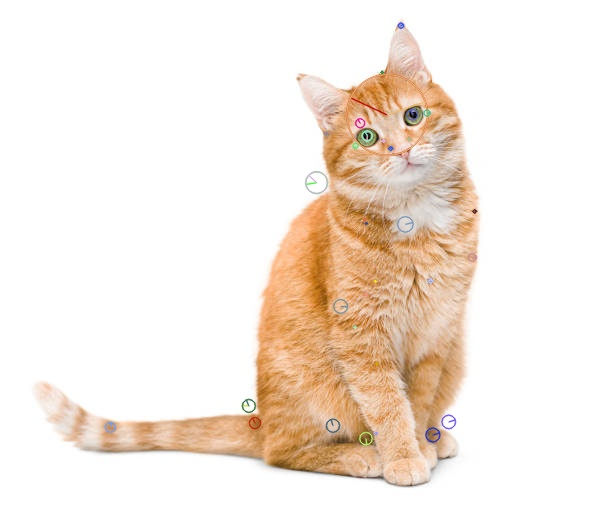

In [ ]:
import cv2
from IPython.display import Image, display
import numpy as np

# Загрузка изображения
img = cv2.imread('cat.jpg')

# Преобразование в оттенки серого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Создание объекта SIFT
sift = cv2.SIFT_create(contrastThreshold=0.065, edgeThreshold=1.8)

# Обнаружение ключевых точек и описание дескрипторов
kp, des = sift.detectAndCompute(gray, None)

# Визуализация ключевых точек
img_sift = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Сохранение результата в файл
cv2.imwrite('SIFT_Keypoints.jpg', img_sift)

# Отображение результата
display(Image('SIFT_Keypoints.jpg'))

Задание:
1.	Изучите влияние параметров contrastThreshold и edgeThreshold детектора SIFT на количество и качество обнаруженных ключевых точек.
2.	Используйте детектор SIFT и Harris для сравнения одного и того же объекта на изображении с разными поворотами и масштабами. Для этого задания понадобится два изображения одного и того же объекта, снятые под разными углами или с разным масштабом.
bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Применение критерия отсечения по расстоянию
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append([m])

Самостоятельная работа:
Решите представленные выше задачи с помощью детекторов cv2.ORB_create(), cv2.AKAZE_create(), или cv2.BRISK_create().
